# Coursework 1 - Tutorial (22 October 2020)
Notebook prepared by your tutor Michał Robert Hoffman and delivered by Mengya Liu Mengya.Liu@soton.ac.uk.

Feel free to modify as required.

## Overview

In this coursework, we use Python to import fishing data and analyse it.
Please read the coursework specification (CW1) for further instructions.

This tutorial will cover the most important elements you need to report on, but not all! Always refer to your lecture notes if you're not sure what to cover.

### Important notes:

You are required to submit a properly formatted report as you are introduced in the writing tutorial. Jupyter notebook submissions will not be accepted! 

Also the graphics we generate below are very basic. You will be required to make them look more professional, by manipulating the size of the graphics, and finding optimal graphing parameters, such as bin sizes etc. You may not reuse your friends image files, as that may constitute a breach of academic integrity. Also, all your write-ups in the final report must be your own original work. And import figures you generated by code instead of screenshots.

Please also note that some outputs have been pre-populated from you. When you change your code cells and run them, the outputs may change slightly, which is expected! If your new output looks very different to the previous outputs, that could be a problem. Please always remember to reimport libraries and dataset once you close the kernel and rerun single cells.

## Importing the libraries

In this case we are going to use the library pandas. 
You can find the documentation of the library [here](https://pandas.pydata.org/). 
This library is one of the most important libraries to analyse data in Python. 
It is connected with Numpy and Matplotlib libraries. Check more about these libraries [here]
(http://www.numpy.org/) and [here](https://matplotlib.org/).

Fill in the blanks in the imports below:

In [2]:
# Import the libraries pandas, and matplotlib
# for matplotlib just load pyplot
import pandas as pd

# Include this line in case the figures not show up in the web page
%matplotlib inline 
import matplotlib as plt 
# This is to format your plots 
# and do things like plt.figure(figsize=(20,10)) which set the figure size to (20, 10)


Everytime you change the code, remember to press "Run" or press Ctrl+Enter (or Shift+Enter) to rerun your code.

In the next section, we fill in the filename (file is specified in your coursework spec, download it first and place in a directory that can be accessed by your Jupyter Notebook) and read in the data.

## Reading the file into a dataframe.

(NB. Do you know what a dataframe is? Can you explain it using simple English?)

For more information on dataframes, google "what are pandas dataframes?".

You'll need to pass some paramateres to the pandas library, so that it knows the following:
the filename,
the separator (what character separates the data points in each row in the file?)
is there a header in the file (if not, say None)
is there a special column in the file that's used to index that file?

In [3]:
filename = "fish1.txt"

time_weight_bait_data = pd.read_csv(filename, sep= " ", header= None, index_col= None)

Find a way of finding the "shape" of the data. You can google this if necessary.
Shape is a tuple that gives you the number of columns followed by the number of rows.
Is shape a method or an attribute? What does it mean? What's the difference?


In [4]:
time_weight_bait_data.shape

(400, 3)

In [5]:
#Give human-readable names to the columns
time_weight_bait_data.columns=["X","Y","Z"]

In [6]:
#Display only the top rows, the parameter of the function is the number of rows to display
time_weight_bait_data.head(5)

,X,Y,Z
0,15.25,2.40,B
1,7.43,1.66,C
2,7.17,2.75,C
3,2.93,1.21,A
4,11.07,0.39,C


In [7]:
#Now, you will display a sample of random rows, pass the number of rows as the parameter to the function
time_weight_bait_data.sample(5)


,X,Y,Z
228,1.17,1.62,A
70,6.72,1.58,C
34,21.32,2.94,C
52,20.97,1.73,C
101,21.01,1.37,C


array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>]], dtype=object)

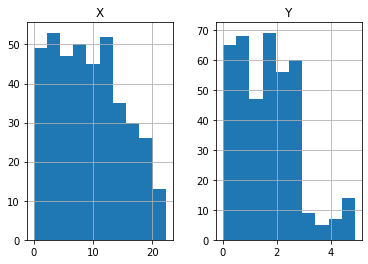

In [8]:
# Now, generate histograms for each column using the DataFrame's built-in function
# N.B. there are many ways to do this
# First, type a dot "." after the objects name
# Next press the 'Tab' key 
# Type "h" and you will see the methods starting with that letter
# Remember to add the brackets () at the end for a function call!

time_weight_bait_data.hist()


In [9]:
#Now specify the column size Weight (if you named it that!), hide the grid, and set bins to 50
#Then rerun the histogram

array([[<AxesSubplot:title={'center':'X'}>]], dtype=object)

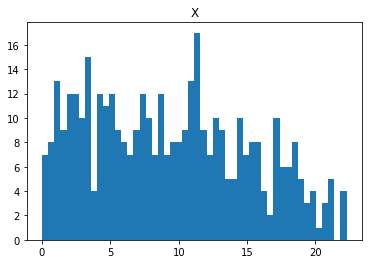

In [10]:
# To plot a histgrom chart only for one column, pass the column name as a parameter to the function
time_weight_bait_data.hist(column="X",grid=False, bins=50)


In [11]:
#If you run the "describe" function, it will show you LOTS of useful stats for both colunmns
time_weight_bait_data.describe()

,X,Y
count,400.000000,400.00000
mean,9.370525,1.66740
std,5.796400,1.10816
min,0.010000,0.01000
25%,4.325000,0.70750
50%,9.020000,1.61500
75%,13.747500,2.40000
max,22.270000,4.88000


In [12]:
#Additionally calculate the skewness and kurtosis for each column

#You can use your dataframe's built-in methods for that:

time_weight_bait_data.skew()

X    0.266856
Y    0.653793
dtype: float64

In [13]:
time_weight_bait_data.kurtosis()

X   -0.946594
Y    0.161891
dtype: float64

In [14]:
#Finally, find the smallest and biggest data values:
time_weight_bait_data["Y"].max()


4.88

In [15]:
time_weight_bait_data["Y"].min()

0.01

# Seaborn Visualisations
We will be using Seaborn for more complex visualisations.

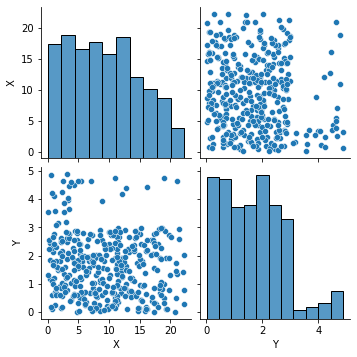

In [16]:
import seaborn as sns # For visualisations

#Run the pairplot function from seaborn on your data frame

sns.pairplot(time_weight_bait_data)


<AxesSubplot:xlabel='Y', ylabel='X'>

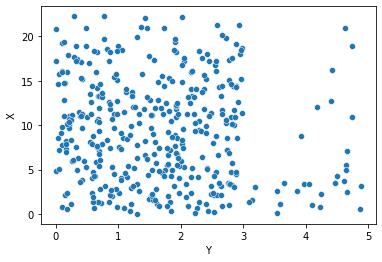

In [17]:
# Run the scatterplot of Weight vs. Time on your dataframe
sns.scatterplot(x="Y", y="X", data=time_weight_bait_data)


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X', ylabel='Density'>

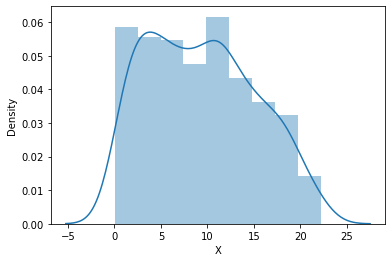

In [18]:
#Now generate smooth curves for the distributions of both variables

sns.distplot(time_weight_bait_data["X"])


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y', ylabel='Density'>

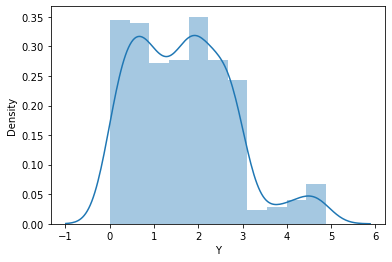

In [19]:
sns.distplot(time_weight_bait_data["Y"])

In [20]:
#Create a new markdown cell below and write a summary of your findings from the plots above

# Digging deeper into the correlation

<AxesSubplot:xlabel='X', ylabel='Y'>

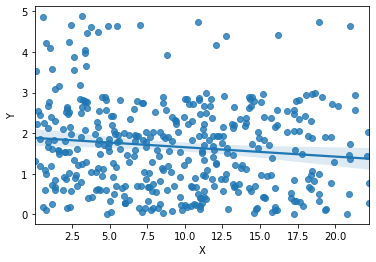

In [21]:
# Create a regplot to figure out the correlation
# It's your choice to choose the methodology for correlation calculation
# And it would be better to include your reason for your choice
sns.regplot(x="X", y="Y", data=time_weight_bait_data)

In [22]:
#Import stats from scipy

from scipy import stats


In [23]:
# Use the pearsonr method to find the correlation details 
# Is it positive or negative?
# Is it statistically significant?
stats.pearsonr(time_weight_bait_data["X"],time_weight_bait_data["Y"])

(-0.12059298863990128, 0.015816415118020677)

In [24]:
# Define a named function that calculates the R-squared using what we did in the previous step
def r2(x,y):
    return stats.pearsonr(x,y)[0]**2

0.01454266890910336

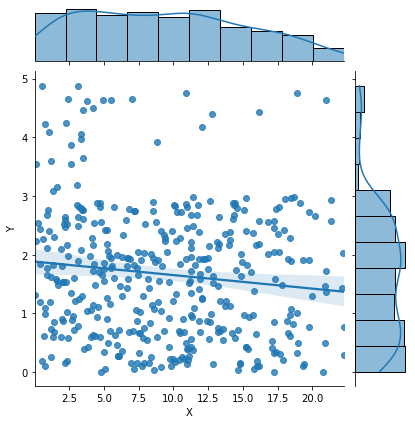

In [27]:
# You can experiment with some other functions like jointplot
# 'kind' parameter marks the type of charts to plot
# Are there other kind of charts to use?
#stat_func=2 is not avalibale anymore
#sns.jointplot(x="X", y="Y", data=time_weight_bait_data, kind="reg", stat_func=r2)
sns.jointplot(x="X", y="Y", data=time_weight_bait_data, kind="reg")

r2(time_weight_bait_data["X"],time_weight_bait_data["Y"])

In [26]:
#Create a new markdown cell below and write a summary of your findings from the plots above
#Use headings of different sizes

## [This is the end of your tutorial.]

If you finished this early, have a look at the sklearn and numpy docs and examples online.

### Tips for Report
- Add titles to your charts
- Try to use color to separate different variables
- Explain the results you get from both charts or statistic information.